# 1. Exploratory analysis (EDA), standarization, normalization, outliers and encoding

In [115]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Estandarización
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

# Encoding
# ==============================================================================
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Guardar modelo
# ==============================================================================
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [141]:
# reads csv
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour
- clarity: a measurement of how clear the diamond is
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

### Info:
- Carat = 200mg

In [148]:
df_density = df_train.copy()
df_density['weight'] = df_density.carat * 200
df_density['volume'] = df_density.x * df_density.y * df_density.z
df_density['density'] = df_density['weight']/df_density['volume']
df_density.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,weight,volume,density
id,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,60.0,49.437424,1.213655
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,202.0,167.551728,1.205598
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,144.0,116.024916,1.241113
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,216.0,175.141200,1.233291
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,72.0,57.739500,1.246980


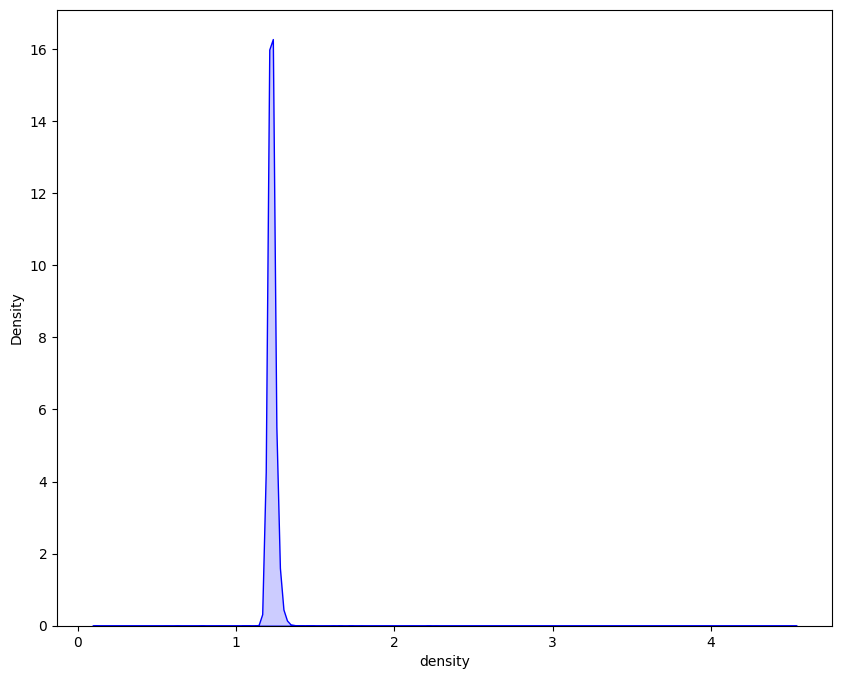

In [151]:
sns.kdeplot(
    df_density.density, 
    color='blue',
    fill=True,
    alpha=.2);

# Exploratory analysis (EDA)

In [118]:
df_train.shape

(40455, 10)

In [119]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [121]:
df_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [122]:
# df_train[df_train.duplicated() == True].value_counts().sum()
df_train.duplicated().sum()

85

In [123]:
df_train.drop_duplicates(inplace=True)

In [124]:
df_train.duplicated().sum()

0

In [125]:
df_train.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40370.0,0.797478,0.475516,0.200,0.400,0.7000,1.040,5.010
depth,40370.0,61.745063,1.436153,43.000,61.000,61.8000,62.500,79.000
table,40370.0,57.452968,2.234980,44.000,56.000,57.0000,59.000,95.000
x,40370.0,5.729301,1.124362,0.000,4.710,5.6900,6.540,10.740
y,40370.0,5.733097,1.154051,0.000,4.720,5.7000,6.540,58.900
z,40370.0,3.537376,0.710448,0.000,2.910,3.5200,4.030,31.800
price,40370.0,7.784104,1.016725,5.787,6.851,7.7805,8.581,9.842


In [126]:
df_train.describe(include='object').T

,count,unique,top,freq
cut,40370,5,Ideal,16196
color,40370,7,G,8389
clarity,40370,8,SI1,9759


## Variables:
- Response: 
    - Numeric: price
- Predict:
    - Numeric: carat, depth, table, x, y, z
    - Categoric: cut, color, clarity

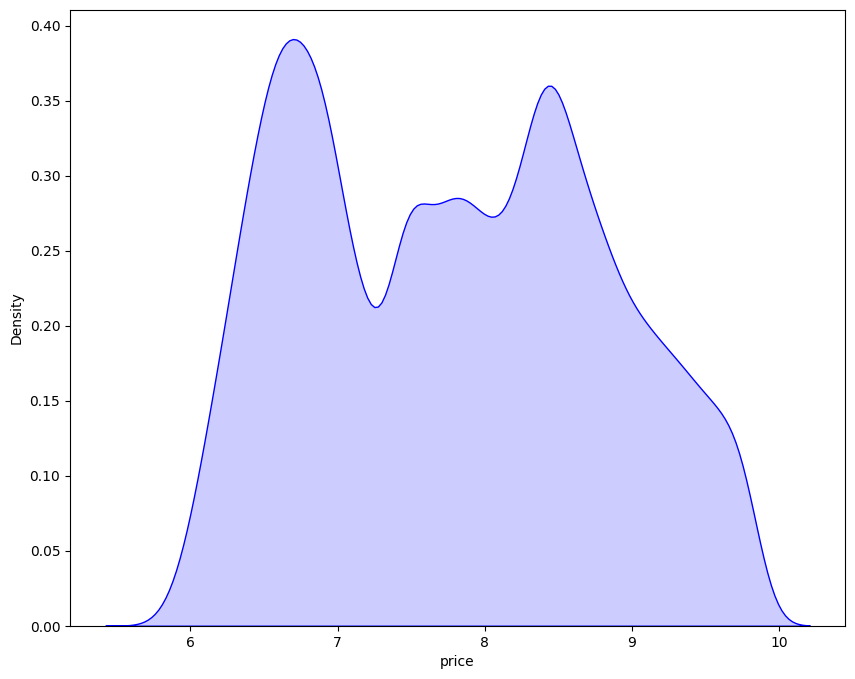

In [127]:
# vamos a ver visualmente como está distribuida la variable respuesta

sns.kdeplot(
    df_train.price, 
    color='blue',
    fill=True,
    alpha=.2);

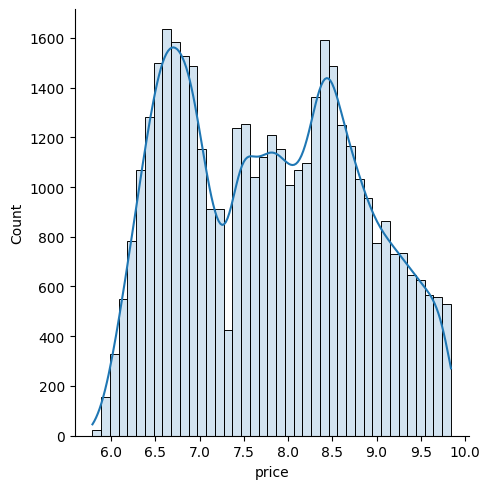

In [128]:
sns.displot(data = df_train,
             x = 'price',
             kde = True,
             alpha=.2);

In [129]:
stats.shapiro(df_train['price'])
# se observa que la variable respuesta posee un p-value de 0.0, por lo que no sigue una distribución normal
# es necesario aplicar métodos de normalización

ShapiroResult(statistic=0.9630078077316284, pvalue=0.0)

## Prediction variables:

#### Numeric:

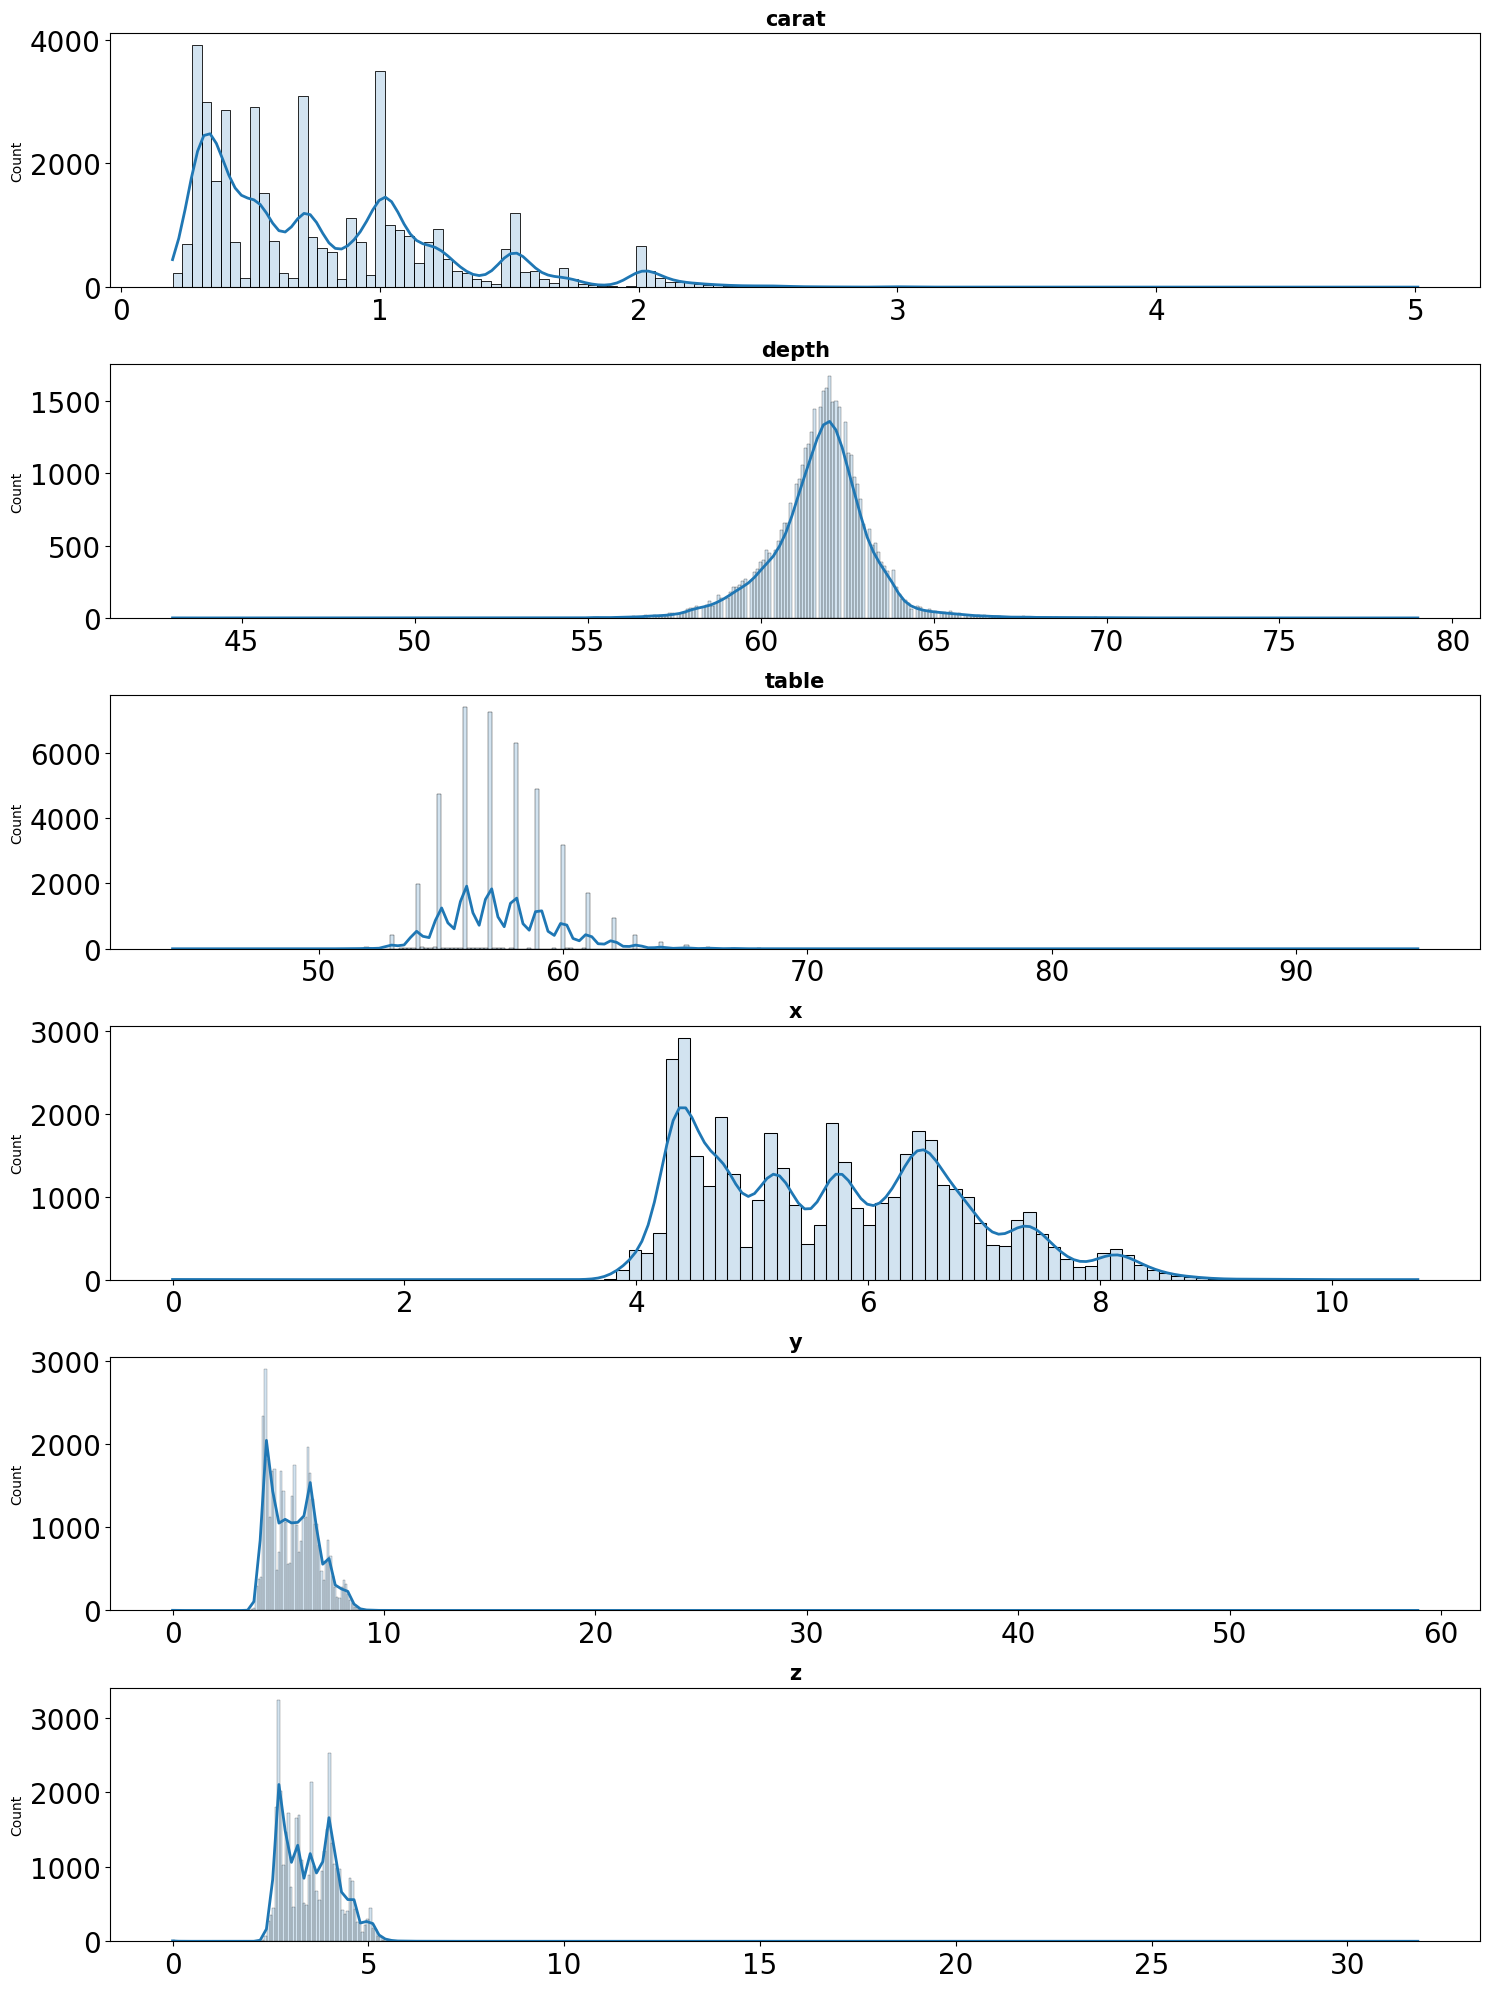

In [130]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

axes = axes.flat

columnas_numeric = df_train.drop(['price'], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data=columnas_numeric,
        x=colum,
        kde=True, 
        line_kws={'linewidth': 2}, 
        alpha=0.2, 
        ax=axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = 'bold')
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel('')
    

fig.tight_layout();

#### Categoric:

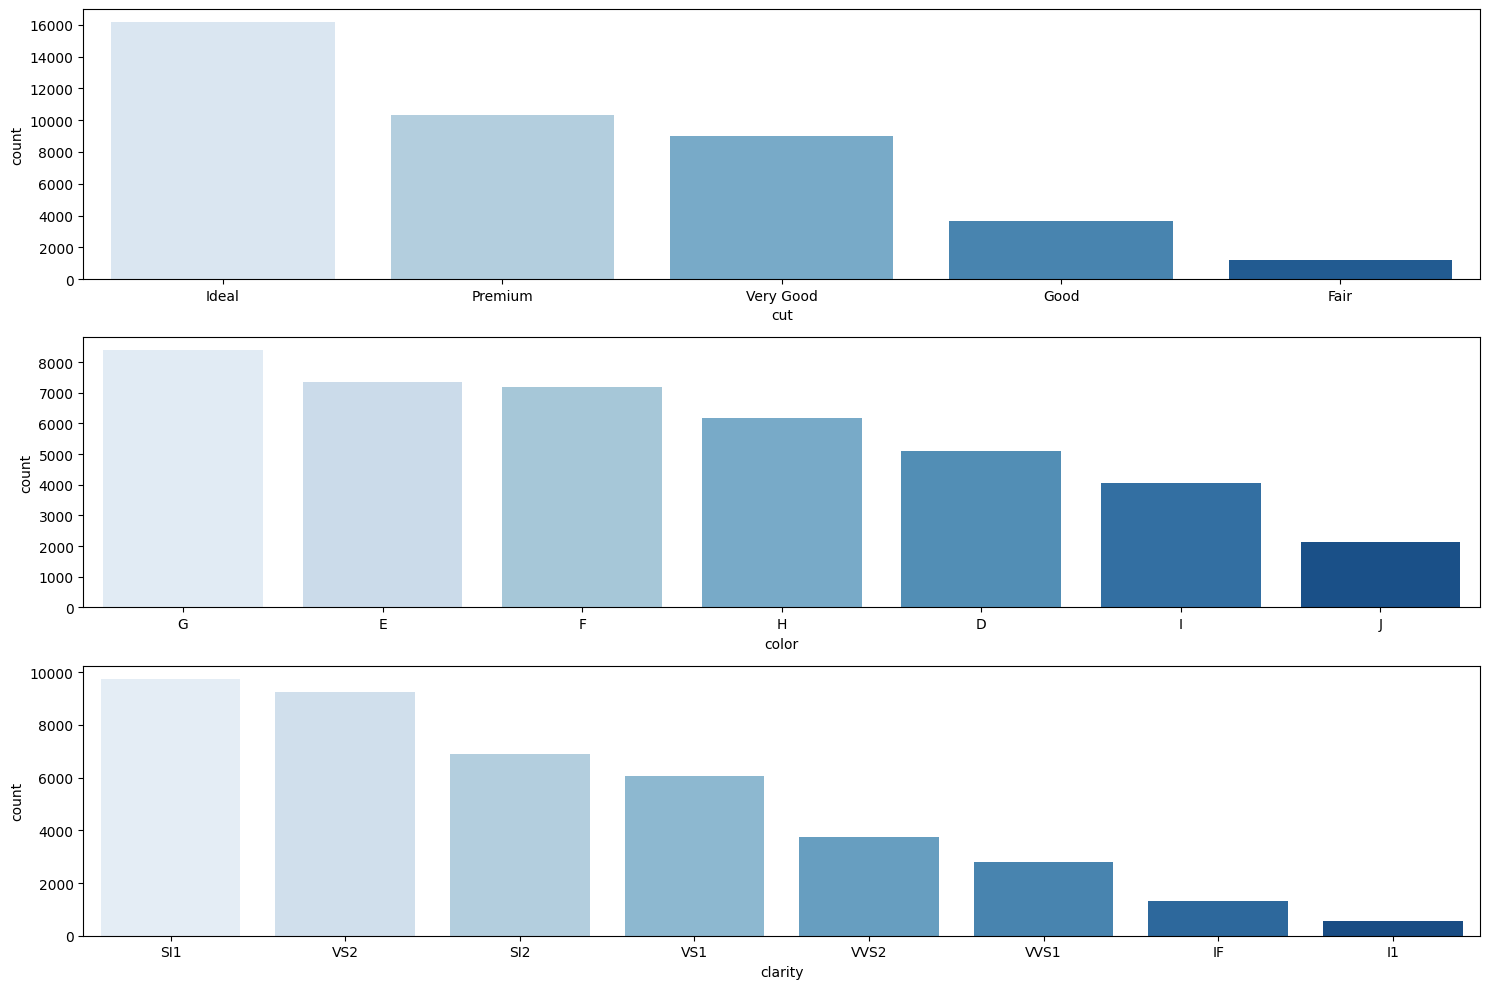

In [131]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):
    sns.countplot(
                x=df_train[col], 
                ax=axes[i],
                palette='Blues', 
                order=df_train[col].value_counts().index)

fig.tight_layout();

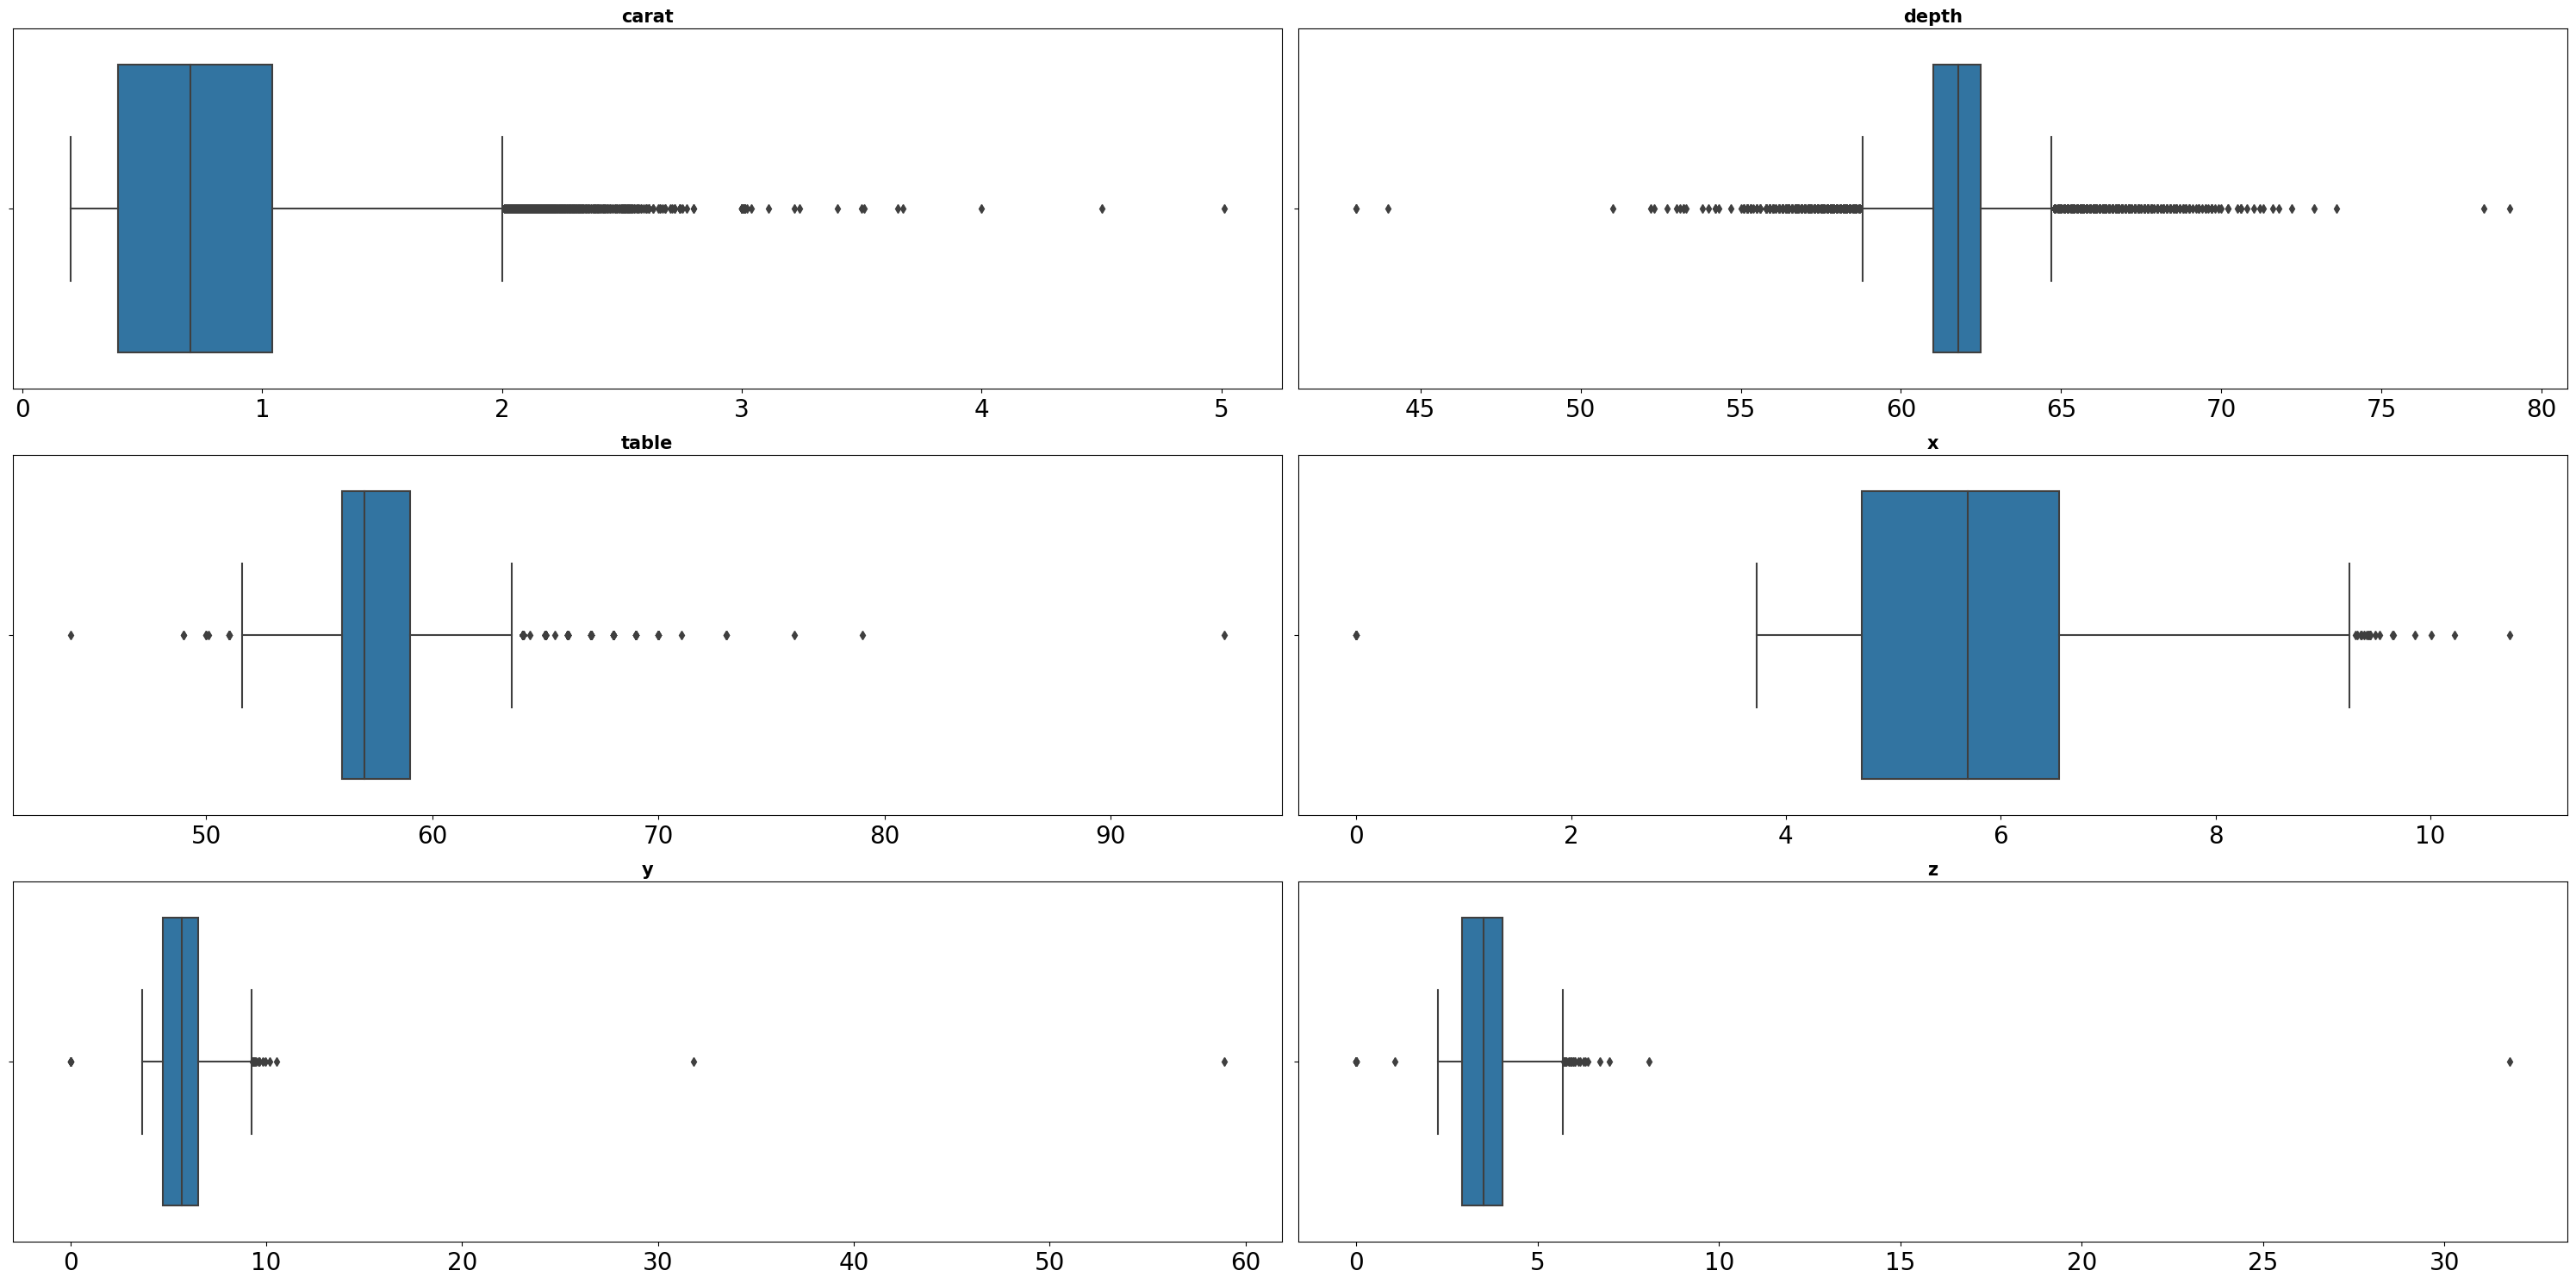

In [132]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))

axes = axes.flat

columnas_numeric = df_train.drop(['price'], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.boxplot(
        data=df_train,
        x=colum,  
        ax=axes[i])
    
    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel('')
    

fig.tight_layout();

In [142]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df_train[col], 25)
        Q3 = np.nanpercentile(df_train[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = len(list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices 

ind = detectar_outliers(columnas_numeric, df_train)
ind

{'carat': 1450, 'depth': 1907, 'table': 448, 'x': 26, 'y': 23, 'z': 44}

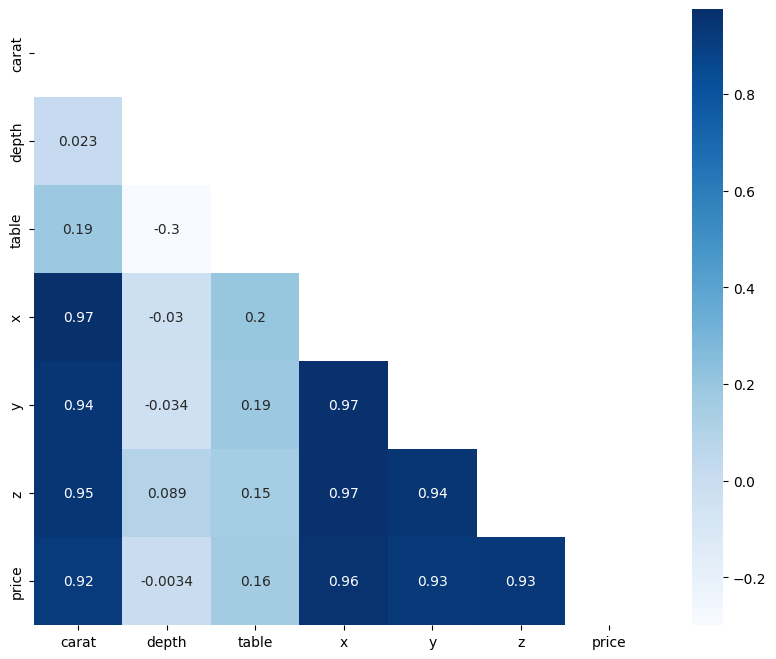

In [139]:
mask = np.triu(np.ones_like(df_train.corr(numeric_only=True), dtype=np.bool_))
sns.heatmap(df_train.corr(numeric_only=True), 
            cmap='Blues', 
            mask=mask,
            annot=True);

# estandarización

In [134]:
df_copy = df_train.copy()

In [135]:
def standardize_numeric_data(df):
    # Extraer columnas numéricas excluyendo variables discretas
    num_columns = df.select_dtypes(include=np.number).drop(['price'], axis=1).columns
    
    # Crear objeto RobustScaler y ajustarlo a las columnas numéricas
    robust = RobustScaler()
    robust.fit(df[num_columns])
    
    # Transforma las columnas numéricas y convierte el array resultante en un dataframe
    X_robust = robust.transform(df[num_columns])
    df[num_columns] = X_robust
    
    with open(f'../data/rob_scaler.pkl', 'wb') as rob_scal:
        pickle.dump(robust, rob_scal)  

    return df

In [136]:
num_columns = df_copy.select_dtypes(include=np.number).drop(['price'], axis=1).columns
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [137]:
df_copy = standardize_numeric_data(df_copy)
df_copy.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,-0.625000,Premium,D,SI2,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353
1,0.484375,Ideal,E,VVS2,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183
2,0.031250,Ideal,F,VS2,0.000000,0.666667,0.010929,0.021978,0.017857,7.983
3,0.593750,Very Good,G,SI2,0.933333,0.000000,0.464481,0.439560,0.535714,8.371
4,-0.531250,Premium,G,VS1,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588


# encoding

In [140]:
df_copy_2= df_train.copy()
df_copy_2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
